In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Plot stuff

### Pendulum

In [216]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.PendulumTest_res.csv')

In [217]:
res.columns.tolist()

['time',
 'p.body.Active',
 'p.body.omega[1]',
 'p.body.omega[2]',
 'p.body.omega[3]',
 'p.body.q[1]',
 'p.body.q[2]',
 'p.body.q[3]',
 'p.body.q[4]',
 'p.body.r[1]',
 'p.body.r[2]',
 'p.body.r[3]',
 'p.joint.angle',
 'p.joint.mu',
 'der(p.body.Active)',
 'der(p.body.omega[1])',
 'der(p.body.omega[2])',
 'der(p.body.omega[3])',
 'der(p.body.q[1])',
 'der(p.body.q[2])',
 'der(p.body.q[3])',
 'der(p.body.q[4])',
 'der(p.body.r[1])',
 'der(p.body.r[2])',
 'der(p.body.r[3])',
 'der(p.joint.angle)',
 'der(p.joint.mu)',
 'der(p.body.OutPort.omega[1])',
 'der(p.body.OutPort.omega[2])',
 'der(p.body.OutPort.omega[3])',
 'der(p.body.T[1,1])',
 'der(p.body.T[1,2])',
 'der(p.body.T[1,3])',
 'der(p.body.T[2,1])',
 'der(p.body.T[2,2])',
 'der(p.body.T[2,3])',
 'der(p.body.T[3,1])',
 'der(p.body.T[3,2])',
 'der(p.body.T[3,3])',
 'der(p.body.v[1])',
 'der(p.body.v[2])',
 'der(p.body.v[3])',
 'der(p.joint.RB[1])',
 'der(p.joint.RB[2])',
 'der(p.joint.RB[3])',
 'p.F[1]',
 'p.F[2]',
 'p.F[3]',
 'p.M[1]'

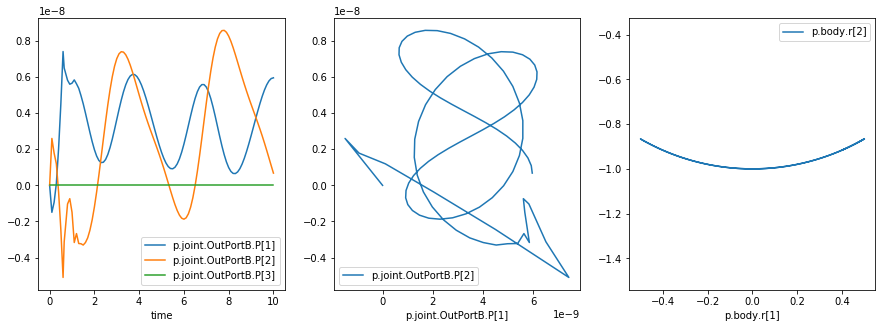

In [226]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

res[
    [ 'time'
    , 'p.joint.OutPortB.P[1]'
    , 'p.joint.OutPortB.P[2]'
    , 'p.joint.OutPortB.P[3]'
    ]
].plot(x = 'time', ax = axs[0])

res[
    [ 'p.joint.OutPortB.P[1]'
    , 'p.joint.OutPortB.P[2]'
    ]
].plot(x = 'p.joint.OutPortB.P[1]', ax = axs[1])

axs[2].axis('equal')
res[
    [ 'p.body.r[1]'
    , 'p.body.r[2]'
    ]
].plot(x = 'p.body.r[1]', ax = axs[2])

### Double Pendulum

In [241]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.DoublePendulumTest_res.csv')

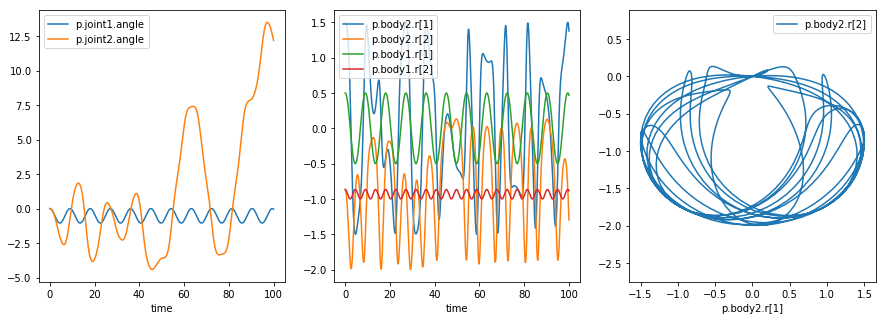

In [242]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

res[
    [ 'time'
    , 'p.joint1.angle'
    , 'p.joint2.angle'
    ]
].plot(x = 'time', ax = axs[0])

res[
    [ 'time'
    , 'p.body2.r[1]'
    , 'p.body2.r[2]'
    , 'p.body1.r[1]'
    , 'p.body1.r[2]'
    ]
].plot(x = 'time', ax = axs[1])

axs[2].axis('equal')
res[
    [ 'p.body2.r[1]'
    , 'p.body2.r[2]'
    ]
].plot(x = 'p.body2.r[1]', ax = axs[2])

### Single body rolling

In [243]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.SingleBodyRollingTest_res.csv')

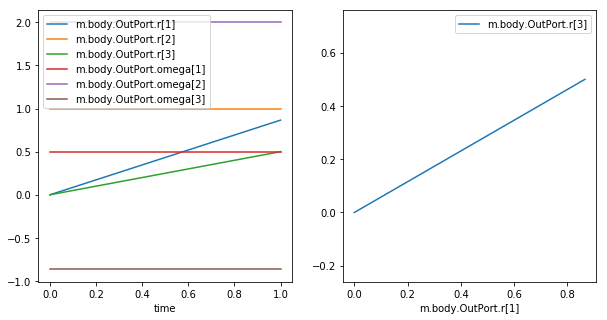

In [244]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

res[
    [ 'time'
    , 'm.body.OutPort.r[1]'
    , 'm.body.OutPort.r[2]'
    , 'm.body.OutPort.r[3]'
    , 'm.body.OutPort.omega[1]'
    , 'm.body.OutPort.omega[2]'
    , 'm.body.OutPort.omega[3]'
    ]
].plot(x = 'time', ax = ax1)

ax2.axis('equal')
res[
    [ 'm.body.OutPort.r[1]'
    , 'm.body.OutPort.r[3]'
    ]
].plot(x = 'm.body.OutPort.r[1]', ax = ax2)

### Omni-wheel without contacts and gravity

##### Cleanup

In [2]:
# !rm /home/vf/om/models/omni/test/out/MbsLite.Test.SingleRollerOmniWheelTest*

#### Calc

In [39]:
res = pd.read_csv('/home/vf/om/models/omni/test/out/MbsLite.Test.Omni.OmniWheelAtRestTest_res.csv')

In [31]:
# res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.Omni.OmniWheelAtRestTest_res.csv')

In [40]:
n = 5

In [41]:
res.head()

,time,m.wheel.Joints[1].angle,m.wheel.Joints[2].angle,m.wheel.Joints[3].angle,m.wheel.Joints[4].angle,m.wheel.Joints[5].angle,m.wheel.Joints[1].mu,m.wheel.Joints[2].mu,m.wheel.Joints[3].mu,m.wheel.Joints[4].mu,...,m.wheel.Wheel.OutPort.omega[3],m.wheel.Wheel.OutPort.r[1],m.wheel.Wheel.OutPort.r[2],m.wheel.Wheel.OutPort.r[3],m.wheel.Wheel.OutPort.v[1],m.wheel.Wheel.OutPort.v[2],m.wheel.Wheel.OutPort.v[3],"m.wheel.Wheel.T[1,1]","m.wheel.Wheel.T[2,1]","m.wheel.Wheel.T[3,1]"
0,0.000,0,0,0,0,0,0,0,0,0,...,1,0.000000e+00,0.05,0,0.000000e+00,0.000000e+00,0,1.000000,0.000,0
1,0.001,0,0,0,0,0,0,0,0,0,...,1,6.424176e-25,0.05,0,1.298048e-21,4.039688e-21,0,1.000000,0.001,0
2,0.002,0,0,0,0,0,0,0,0,0,...,1,2.710424e-24,0.05,0,2.547305e-21,7.652714e-21,0,0.999998,0.002,0
3,0.003,0,0,0,0,0,0,0,0,0,...,1,6.727635e-24,0.05,0,4.839587e-21,1.044234e-20,0,0.999996,0.003,0
4,0.004,0,0,0,0,0,0,0,0,0,...,1,1.258839e-23,0.05,0,6.781812e-21,1.378286e-20,0,0.999992,0.004,0


In [42]:
df = res[
    [ 'time'
    , 'm.wheel.OutPortK.T[1,1]'
    , 'm.wheel.OutPortK.T[1,2]'
    , 'm.wheel.OutPortK.T[1,3]'
    ]
]
df = df.assign(
    **{ 'm.selfRot' : df.apply(lambda row:
        ( np.arccos(row['m.wheel.OutPortK.T[1,1]'])
        if row['m.wheel.OutPortK.T[1,2]'] >= 0 else
#         np.arccos(row['m.wheel.OutPortK.T[1,1]'])
        2 * np.pi - np.arccos(row['m.wheel.OutPortK.T[1,1]'])
        ) * 180/np.pi
        , axis = 1
        )
      }
)
df.head()

,time,"m.wheel.OutPortK.T[1,1]","m.wheel.OutPortK.T[1,2]","m.wheel.OutPortK.T[1,3]",m.selfRot
0,0.000,1.000000,0.000,0,0.000000
1,0.001,1.000000,-0.001,0,359.942704
2,0.002,0.999998,-0.002,0,359.885408
3,0.003,0.999996,-0.003,0,359.828113
4,0.004,0.999992,-0.004,0,359.770817


In [43]:
tmp = pd.DataFrame(
    { 'time'   : np.linspace(0, 4 * np.pi, 100)
    , 'cos'    : np.cos(np.linspace(0, 4 * np.pi, 100))
    , 'arccos' : np.arccos(np.cos(np.linspace(0, 4 * np.pi, 100)))
    }
)
tmp.head()

,arccos,cos,time
0,0.000000,1.000000,0.000000
1,0.126933,0.991955,0.126933
2,0.253866,0.967949,0.253866
3,0.380799,0.928368,0.380799
4,0.507732,0.873849,0.507732


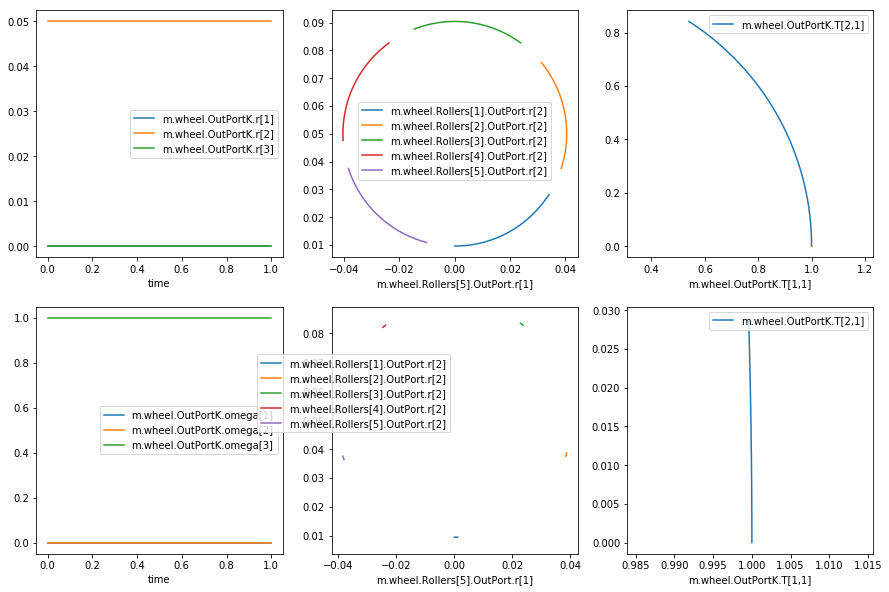

In [44]:
fig, axs = plt.subplots(2, 3, figsize = (15, 10))

res[
    [ 'time'
    , 'm.wheel.OutPortK.r[1]'
    , 'm.wheel.OutPortK.r[2]'
    , 'm.wheel.OutPortK.r[3]'
    ]
].plot(x = 'time', ax = axs[0][0])

axs[0][1].axis('equal')
for i in range(n):
    res[
        [ 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]'
        , 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[2]'
        ]
    ].plot(x = 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]', ax = axs[0][1])
axs[0][1].legend(bbox_to_anchor=(0.5, 0.65))

axs[0][2].axis('equal')
res[
    [ 'm.wheel.OutPortK.T[1,1]'
    , 'm.wheel.OutPortK.T[2,1]'
    ]
].plot(x = 'm.wheel.OutPortK.T[1,1]', ax = axs[0][2])

res[
    [ 'time'
    , 'm.wheel.OutPortK.omega[1]'
    , 'm.wheel.OutPortK.omega[2]'
    , 'm.wheel.OutPortK.omega[3]'
    ]
].plot(x = 'time', ax = axs[1][0])

axs[1][1].axis('equal')
for i in range(n):
    res.head(30)[
        [ 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]'
        , 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[2]'
        ]
    ].plot(x = 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]', ax = axs[1][1])
axs[1][1].legend(bbox_to_anchor=(0.5, 0.65))

axs[1][2].axis('equal')
res.head(30)[
    [ 'm.wheel.OutPortK.T[1,1]'
    , 'm.wheel.OutPortK.T[2,1]'
    ]
].plot(x = 'm.wheel.OutPortK.T[1,1]', ax = axs[1][2])

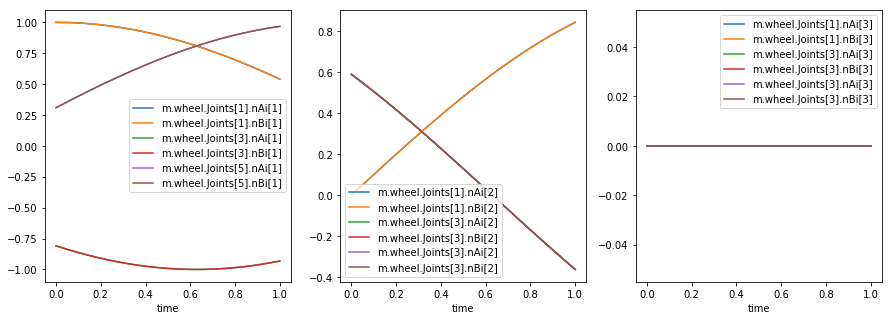

In [45]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

res[
    [ 'time'
    , 'm.wheel.Joints[1].nAi[1]'
    , 'm.wheel.Joints[1].nBi[1]'
    , 'm.wheel.Joints[3].nAi[1]'
    , 'm.wheel.Joints[3].nBi[1]'
    , 'm.wheel.Joints[5].nAi[1]'
    , 'm.wheel.Joints[5].nBi[1]'
    ]
].plot(x = 'time', ax = axs[0])

res[
    [ 'time'
    , 'm.wheel.Joints[1].nAi[2]'
    , 'm.wheel.Joints[1].nBi[2]'
    , 'm.wheel.Joints[3].nAi[2]'
    , 'm.wheel.Joints[3].nBi[2]'
    , 'm.wheel.Joints[3].nAi[2]'
    , 'm.wheel.Joints[3].nBi[2]'
    ]
].plot(x = 'time', ax = axs[1])

res[
    [ 'time'
    , 'm.wheel.Joints[1].nAi[3]'
    , 'm.wheel.Joints[1].nBi[3]'
    , 'm.wheel.Joints[3].nAi[3]'
    , 'm.wheel.Joints[3].nBi[3]'
    , 'm.wheel.Joints[3].nAi[3]'
    , 'm.wheel.Joints[3].nBi[3]'
    ]
].plot(x = 'time', ax = axs[2])


In [38]:
res[
    [ 'time' 
    , 'm.wheel.OutPortK.T[1,1]'
    , 'm.wheel.OutPortK.T[2,1]'
    ]
].tail(10)

,time,"m.wheel.OutPortK.T[1,1]","m.wheel.OutPortK.T[2,1]"
992,0.992,1,0
993,0.993,1,0
994,0.994,1,0
995,0.995,1,0
996,0.996,1,0
997,0.997,1,0
998,0.998,1,0
999,0.999,1,0
1000,1.000,1,0
1001,1.000,1,0


### Omni-wheel on plane free

In [127]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.Omni.OmniWheelOnPlaneTest_res.csv')

In [128]:
n = 5
nOne = 5

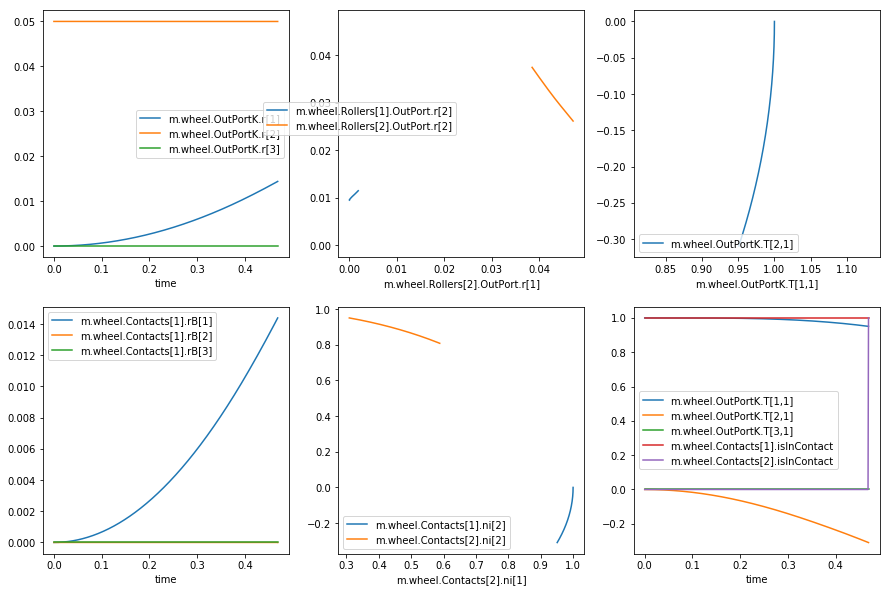

In [126]:
fig, axs = plt.subplots(2, 3, figsize = (15, 10))

res[
    [ 'time'
    , 'm.wheel.OutPortK.r[1]'
    , 'm.wheel.OutPortK.r[2]'
    , 'm.wheel.OutPortK.r[3]'
    ]
].plot(x = 'time', ax = axs[0][0])

axs[0][1].axis('equal')
for i in range(nOne):
    res[
        [ 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]'
        , 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[2]'
        ]
    ].plot( x = 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]'
#                   , y = 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[2]'
                  , ax = axs[0][1] )
axs[0][1].legend(bbox_to_anchor=(0.5, 0.65))

axs[0][2].axis('equal')
res[
    [ 'm.wheel.OutPortK.T[1,1]'
    , 'm.wheel.OutPortK.T[2,1]'
    ]
].plot(
    x = 'm.wheel.OutPortK.T[1,1]', 
#     y = 'm.wheel.OutPortK.T[2,1]', 
    ax = axs[0][2])

res[
    [ 'time'
    , 'm.wheel.Contacts[1].rB[1]'
    , 'm.wheel.Contacts[1].rB[2]'
    , 'm.wheel.Contacts[1].rB[3]'
    ]
].plot(x = 'time', ax = axs[1][0])

axs[0][1].axis('equal')
for i in range(nOne):
    res[
        [ 'm.wheel.Contacts[' + str(i + 1) + '].ni[1]'
        , 'm.wheel.Contacts[' + str(i + 1) + '].ni[2]'
        ]
    ].plot( x = 'm.wheel.Contacts[' + str(i + 1) + '].ni[1]'
#                   , y = 'm.wheel.Contacts[' + str(i + 1) + '].ni[2]'
                  , ax = axs[1][1] )
axs[0][1].legend(bbox_to_anchor=(0.5, 0.65))

res[
    [ 'time'
    , 'm.wheel.OutPortK.T[1,1]'
    , 'm.wheel.OutPortK.T[2,1]'
    , 'm.wheel.OutPortK.T[3,1]'
    , 'm.wheel.Contacts[1].isInContact'
    , 'm.wheel.Contacts[2].isInContact'
    ]
].plot(x = 'time', ax = axs[1][2])


In [129]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(res.iloc[0])

time                                         0.000000e+00
m.wheel.Contacts[5].relvn                    0.000000e+00
m.wheel.Joints[1].angle                      0.000000e+00
m.wheel.Joints[2].angle                      0.000000e+00
m.wheel.Joints[3].angle                      0.000000e+00
m.wheel.Joints[4].angle                      0.000000e+00
m.wheel.Joints[5].angle                      0.000000e+00
m.wheel.Joints[1].mu                         0.000000e+00
m.wheel.Joints[2].mu                         0.000000e+00
m.wheel.Joints[3].mu                         0.000000e+00
m.wheel.Joints[4].mu                         0.000000e+00
m.wheel.Joints[5].mu                         0.000000e+00
m.wheel.Rollers[1].Active                    1.000000e+00
m.wheel.Rollers[2].Active                    1.000000e+00
m.wheel.Rollers[3].Active                    1.000000e+00
m.wheel.Rollers[4].Active                    1.000000e+00
m.wheel.Rollers[5].Active                    1.000000e+00
m.wheel.Roller

In [273]:
R = 0.05
n = 5
k = 2 # starting from 1

vertical = np.array([ 0, 1 ])

alpha = np.pi / n
omega = 1 / R
R1 = R * np.cos(alpha)

wheel_center = R * vertical
roller_angle = 2 * alpha * (k - 1)
roller_center_rel = R1 * np.array([ np.sin(roller_angle), -np.cos(roller_angle) ])
roller_center = wheel_center + roller_center_rel
dist_to_roller_center = np.sqrt(sum(roller_center * roller_center))

roller_v = np.cross([ 0, 0, -omega ], [ roller_center[0], roller_center[1], 0 ])[:-1]
roller_v[1]

-0.7694208842938134

### Vertical Wheel

In [52]:
res = pd.read_csv('/home/vf/om/models/omni/test/out/MbsLite.Test.OmniWheelTest_res.csv')

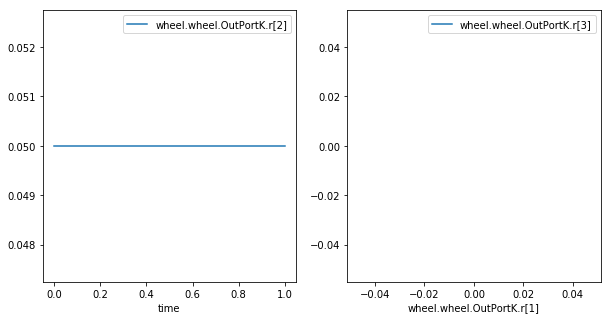

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

res[
    [ 'time'
    , 'wheel.wheel.OutPortK.r[2]'
    ]
].plot(x = 'time', ax = ax1)

ax2.axis('equal')
res[
    [ 'wheel.wheel.OutPortK.r[1]'
    , 'wheel.wheel.OutPortK.r[3]'
    ]
].plot(x = 'wheel.wheel.OutPortK.r[1]', ax = ax2)

# OM

In [ ]:
import OMPython
from OMPython import OMCSessionZMQ

In [ ]:
help(OMPython)

In [2]:
omc = OMCSessionZMQ()

2018-09-15 11:37:09,526 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.vf.port.0f9aeff4836b415db2f5d0b70a221f1d pid=22247


In [3]:
omc.sendExpression("cd()")

'/home/vf/om/models/omni'

In [7]:
omc.sendExpression('cd("tmp")')
omc.sendExpression("cd()")

'/home/vf/om/models/omni/tmp'

In [4]:
omc.sendExpression('loadModel(Modelica)')

True

In [5]:
root = '/home/vf/om/models/omni/thin/MBS'
path_MBS = root + '/package.mo'
path_MBS_Basics = root + '/Basics.mo'
paths = [
    path_MBS,
    path_MBS_Basics,
]
display(paths)

['/home/vf/om/models/omni/thin/MBS/package.mo',
 '/home/vf/om/models/omni/thin/MBS/Basics.mo']

In [12]:
omc.sendExpression('loadFile("' + path_MBS + '")')

False

In [ ]:
sim = omc.sendExpression('simulate(A, outputFormat="csv")')

In [ ]:
sim

In [ ]:
!mv {sim['resultFile']} .

In [ ]:
ls

In [ ]:
res = pd.read_csv('A_res.csv')

In [ ]:
res.hist()

In [ ]:
res['x'].plot()

In [ ]:
res['der(x)'].plot()